In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle("../../Datasets/USA_Filtered.pkl")

In [3]:
df_exploded = df.explode('categories')

In [4]:
df_grouped = df_exploded.groupby("categories").agg({"rating": ["count", "min", "max", "mean", "std"]}).reset_index()

In [5]:
df_grouped.columns = [df_grouped.columns.values[0][0]] + ['_'.join(col) for col in df_grouped.columns.values[1:]]

In [6]:
df_grouped.sort_values("rating_count", ascending=False).to_csv(
    "../../Preprocessing/categories_counts.csv", header=True, index=False)

OSError: Cannot save file into a non-existent directory: '../Preprocessing'

In [ ]:
# Only restaurants

In [6]:
df_rest = df_exploded[df_exploded["categories"].str.contains("Restaurant", na=False)]

In [7]:
df_grouped2 = df_rest.groupby("categories").agg({"rating": ["count", "min", "max", "mean", "std"]}).reset_index()

In [8]:
df_grouped2.columns = [df_grouped2.columns.values[0][0]] + ['_'.join(col) for col in df_grouped2.columns.values[1:]]

In [10]:
df_grouped2.sort_values("rating_count", ascending=False).to_csv(
    "../Preprocessing/categories_counts_only_restaurants.csv", header=True, index=False)

OSError: Cannot save file into a non-existent directory: '../Preprocessing'

In [9]:
import matplotlib.pyplot as plt

In [10]:
def get_temporal_rating_data_for_category(df, category):
    df_temp = df[df["categories"] == category][["rating", "unixReviewTime"]]
    df_temp["year_month"] = pd.to_datetime(
        df_temp["unixReviewTime"], infer_datetime_format=True, unit='s').dt.strftime('%Y-%m')
    df_temp2 = df_temp.groupby(
        "year_month").agg({"rating": "mean"}).reset_index().sort_values("year_month")
    df_temp3 = df_temp2[df_temp2["year_month"] >= "2010-01"]
    return df_temp3

In [11]:
a_df = get_temporal_rating_data_for_category(df=df_rest, category="American Restaurant")
e_df = get_temporal_rating_data_for_category(df=df_rest, category="European Restaurant")
i_df = get_temporal_rating_data_for_category(df=df_rest, category="Indian Restaurant")

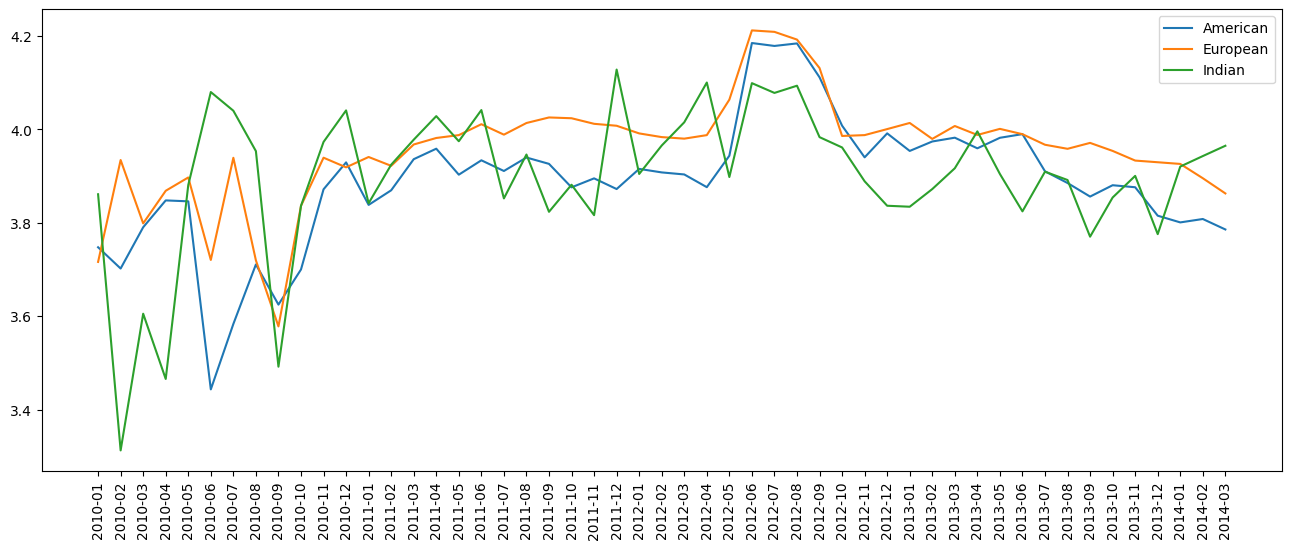

In [16]:
fig = plt.figure(figsize=(16, 6))
plt.plot(a_df["year_month"], a_df["rating"], label="American")
plt.plot(e_df["year_month"], e_df["rating"], label="European")
plt.plot(i_df["year_month"], i_df["rating"], label="Indian")

ax = plt.gca()
plt.xticks(rotation=90)
plt.legend()
# plt.show()
plt.savefig("icea_restr.png", dpi=400)